In [0]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import average_precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [7]:
# importing files from local system
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [8]:
for file in uploaded.keys():
  print('Uploaded file "{name}" with length {length} bytes'.format(name=file, length=len(uploaded[file])))

Uploaded file "diabetes.csv" with length 23873 bytes


In [9]:
diabetes = pd.read_csv("diabetes.csv")
#data = pd.read_csv(uploaded)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#preparing the data
y = diabetes["Outcome"].values
x_data = diabetes.drop(["Outcome"],axis = 1)
# Normalization of dataset
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


## Exploratory Data Analysis

                          Pregnancies   Glucose  ...       Age   Outcome
Pregnancies                  1.000000  0.129459  ...  0.544341  0.221898
Glucose                      0.129459  1.000000  ...  0.263514  0.466581
BloodPressure                0.141282  0.152590  ...  0.239528  0.065068
SkinThickness               -0.081672  0.057328  ... -0.113970  0.074752
Insulin                     -0.073535  0.331357  ... -0.042163  0.130548
BMI                          0.017683  0.221071  ...  0.036242  0.292695
DiabetesPedigreeFunction    -0.033523  0.137337  ...  0.033561  0.173844
Age                          0.544341  0.263514  ...  1.000000  0.238356
Outcome                      0.221898  0.466581  ...  0.238356  1.000000

[9 rows x 9 columns]


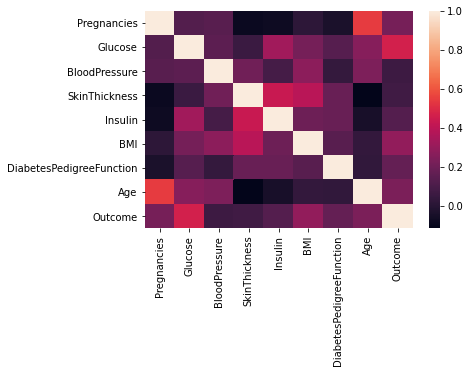

In [13]:
corr = diabetes.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

# Question 2 - Building ML Models 

From the above correlation plot, we see that most features are uncorrelated, thus we don't need to use regularization model

In [15]:
# splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# For mathematical operations, transpose is applied.
#x_train = x_train.T
#x_test = x_test.T
#y_train = y_train.T
#y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (614, 8)
x_test:  (154, 8)
y_train:  (614,)
y_test:  (154,)


## Logistic Regression 

In [17]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(x_train, y_train)
accuracy = diabetesCheck.score(x_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  76.62337662337663 %


Understanding the factors through Logistic Regression

Text(0.5, 0, 'Importance')

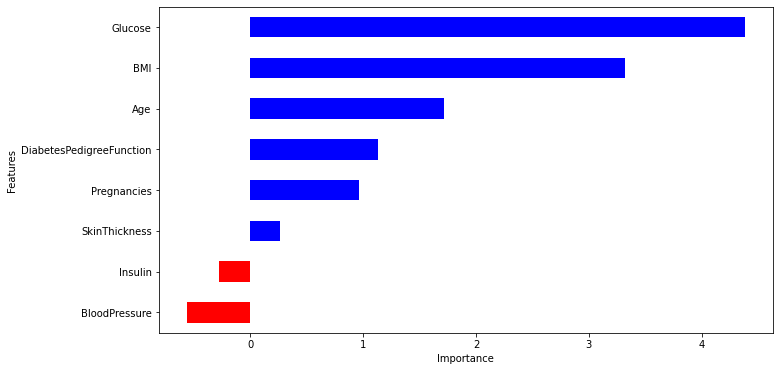

In [19]:
coeff = list(diabetesCheck.coef_[0])
labels = list(x_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From above visualization , we observe


*   Glucose, BMI and Age have significant impact on the diabetes risk
*   Blood Pressure and Risk is negatively correlated to each other



## Support Vector Machines

In [21]:
model_svm = svm.SVC()
model_svm.fit(x_train,y_train)
model_svm.predict(x_test)
accuracy_svm = model_svm.score(x_test, y_test)
print("accuracy = ", accuracy_svm * 100, "%")

accuracy =  74.67532467532467 %


## Random Forest

In [22]:
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(x_train,y_train)
model_rf.predict(x_test)
accuracy_rf = model_rf.score(x_test, y_test)
print("accuracy = ", accuracy_rf * 100, "%")

accuracy =  74.67532467532467 %


# Question 3 - Tuning HyperParametes using GridSearchCV

Tuning Random Forest model Model_rf using Hyperparameters through GridSearchCV 

In [0]:
#checking what parameters are present in current model

In [31]:
print('Parameters currently in use:\n')
pprint(model_rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [33]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [0]:
 #Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 

# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_train, y_train)

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [39]:
#fitting new model and finding parameters
grid_search.fit(x_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.8min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

# Question 4 - Assesing Model Performance

In [67]:
#Accuracy

accuracy_lr = diabetesCheck.score(x_test, y_test)
accuracy_svm = model_svm.score(x_test, y_test)
accuracy_rf = model_rf.score(x_test, y_test)
accuracy_rf_tuned = grid_search.score(x_test, y_test)
print("Accuracy\n")
print("accuracy of logistic regression model = ", accuracy_lr * 100, "%")
print("accuracy of svm model = ", accuracy_svm * 100, "%")
print("accuracy of Random Forest Model = ", accuracy_rf * 100, "%")
print("accuracy of GridSearch tuned Random Forest Model = ", accuracy_rf_tuned * 100, "%")

#Precision
y_score_lr = diabetesCheck.decision_function(x_test)
#precision_lr = average_precision_score(x_test, y_test)
y_score_svm = model_svm.decision_function(x_test)
precision_svm = average_precision_score( y_test,y_score_svm)
y_score_rf = model_svm.decision_function(x_test)
precision_rf = average_precision_score(y_test,y_score_rf)
y_score_rf_tuned = model_svm.decision_function(x_test)
precision_rf_tuned = average_precision_score(y_test, y_score_rf_tuned)
#print("Precision of logistic regression model = ", precision_lr * 100, "%")
print("Precision \n")
print("\n\nPrecision of svm model = ", precision_svm * 100, "%")
print("Precision of Random Forest Model = ", precision_rf * 100, "%")
print("Precision of GridSearch tuned Random Forest Model = ", precision_rf_tuned * 100, "%")




Accuracy

accuracy of logistic regression model =  76.62337662337663 %
accuracy of svm model =  74.67532467532467 %
accuracy of Random Forest Model =  74.67532467532467 %
accuracy of GridSearch tuned Random Forest Model =  76.62337662337663 %
Precision 



Precision of svm model =  68.28113511416177 %
Precision of Random Forest Model =  68.28113511416177 %
Precision of GridSearch tuned Random Forest Model =  68.28113511416177 %


Confusion matrix, without normalization
[[91  8]
 [31 24]]
Normalized confusion matrix
[[0.91919192 0.08080808]
 [0.56363636 0.43636364]]


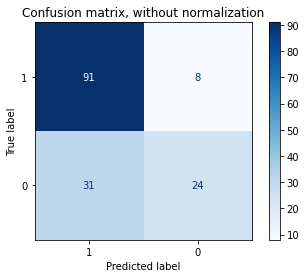

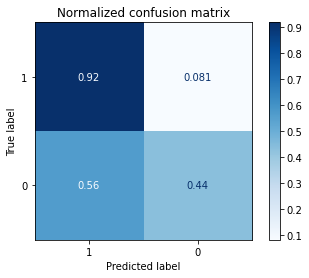

In [69]:
#confusion matrix 
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model_rf, x_test, y_test,
                                 display_labels= [1,0],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

Since we are dealing with healthcare , we see random forest reveals a fairly accurate model (91%).
That's is false positive rate is just 8%.
If we are able to reccomend healthier lifestyle for people, for 91 people it will help them prevent the risk. 
However, that being said, we CANNOT administer medicinal treatment for these people as the model result has to be 99% significant.